In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [81]:
pd.set_option('display.max_rows',None)

In [82]:
df=pd.read_excel(r'C:\Users\Admin\Desktop\FlightDataWebscrape1.xls')
df.head()

,Unnamed: 0,Airline,Flight_Number,Date_of_Departure,From,To,Duration,Total_Stops,Price
0,0,Indigo,6E-5023,Apr 29\n7319\nApr 30\n7318\nMay 01\n7318\nMay ...,Delhi,Mumbai,02h 05m,non-stop,7319.0
1,1,Indigo,6E-6814,Apr 29\n7319\nApr 30\n7318\nMay 01\n7318\nMay ...,Delhi,Mumbai,02h 05m,non-stop,7319.0
2,2,AirAsia,I5-764,Apr 29\n7319\nApr 30\n7318\nMay 01\n7318\nMay ...,Delhi,Mumbai,02h 10m,non-stop,7319.0
3,3,Indigo,6E-2112,Apr 29\n7319\nApr 30\n7318\nMay 01\n7318\nMay ...,Delhi,Mumbai,02h 10m,non-stop,7319.0
4,4,GO FIRST,G8- 530,Apr 29\n7319\nApr 30\n7318\nMay 01\n7318\nMay ...,Delhi,Mumbai,02h 10m,non-stop,7319.0


In [83]:
df.shape

(1422, 9)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1422 non-null   int64  
 1   Airline            1422 non-null   object 
 2   Flight_Number      1422 non-null   object 
 3   Date_of_Departure  1422 non-null   object 
 4   From               1422 non-null   object 
 5   To                 1422 non-null   object 
 6   Duration           1422 non-null   object 
 7   Total_Stops        1422 non-null   object 
 8   Price              1197 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 100.1+ KB


In [85]:
df.isnull().sum()

Unnamed: 0             0
Airline                0
Flight_Number          0
Date_of_Departure      0
From                   0
To                     0
Duration               0
Total_Stops            0
Price                225
dtype: int64

In [86]:
df.drop(['Unnamed: 0','Date_of_Departure','Flight_Number'],axis=1, inplace=True)

In [87]:
df.shape

(1422, 6)

In [88]:
#finding the value count of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('------------------------')
    

Vistara        414
Indigo         331
Air India      223
GO FIRST       189
SpiceJet       145
AirAsia        118
AllianceAir      2
Name: Airline, dtype: int64
------------------------
Delhi      759
Mumbai     510
Kolkata    153
Name: From, dtype: int64
------------------------
Bangalore    345
Delhi        334
Goa          281
Mumbai       202
Kolkata      113
Pune         108
Patna         39
Name: To, dtype: int64
------------------------
02h 10m    39
02h 15m    36
02h 05m    35
02h 20m    23
02h 00m    19
08h 30m    19
02h 25m    14
06h 40m    14
01h 35m    13
09h 20m    13
07h 20m    13
02h 30m    12
06h 20m    12
05h 15m    12
01h 40m    12
02h 50m    11
07h 10m    11
10h 15m    10
02h 45m    10
06h 30m    10
07h 15m    10
07h 05m    10
05h 30m    10
10h 55m    10
06h 10m    10
06h 25m    10
07h 30m    10
02h 40m    10
07h 50m    10
08h 35m     9
01h 45m     9
10h 20m     9
06h 35m     9
05h 45m     9
17h 20m     9
08h 05m     9
06h 45m     9
08h 50m     9
11h 10m     9
06h 15

In [89]:
# Replacing categorical values with numeric data
df.Total_Stops.replace({"non-stop": 0,"1-stop": 1,"2+-stop": 2,"1-stop Via IXU": 3,"1-stop Via IDR": 4,"1-stop Via Indore": 5,"1-stop Via Bhopal": 6,"1-stop Via Raipur": 7},inplace = True)

In [90]:
#filling the float missing data with mean
df['Price'].fillna(df['Price'].mean(),inplace=True)

In [91]:
# Replacing categorical values with numeric data
df.Airline.replace({"Vistara": 0,"Indigo": 1,"Air India": 2,"GO FIRST": 3,"SpiceJet": 4,"AirAsia": 5,"AllianceAir": 6},inplace = True)

In [92]:
# Replacing categorical values with numeric data
df.From.replace({"Delhi": 0,"Mumbai": 1,"Kolkata": 2},inplace = True)

In [93]:
# Replacing categorical values with numeric data
df.To.replace({"Bangalore": 0,"Delhi": 1,"Goa": 2,"Mumbai": 3,"Pune":4,"Kolkata":5,"Patna":6},inplace = True)

In [94]:
#Extracting Duration column into hour and min
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h'in duration[i]:
            duration[i]=duration[i].strip()+ ' 0m'
        else:
            duration[i]='0h '+ duration[i]
            
Duration_hour=[]
Duration_min=[]
for i in range(len(duration)):
    Duration_hour.append(int(duration[i].split(sep='h')[0]))
    Duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [95]:
df['Duration_hour']=Duration_hour
df['Duration_min']=Duration_min
df.drop(['Duration'],axis=1,inplace=True)

In [96]:
df.dtypes

Airline            int64
From               int64
To                 int64
Total_Stops        int64
Price            float64
Duration_hour      int64
Duration_min       int64
dtype: object

In [98]:
df.describe()

,Airline,From,To,Total_Stops,Price,Duration_hour,Duration_min
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,1.776371,0.573840,1.921941,0.917018,15506.781955,10.427567,25.903657
std,1.630741,0.678278,1.673643,0.705965,6081.842455,8.023191,16.839763
min,0.000000,0.000000,0.000000,0.000000,6258.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,10843.250000,5.000000,10.000000
50%,1.000000,0.000000,2.000000,1.000000,15506.781955,8.000000,25.000000
75%,3.000000,1.000000,3.000000,1.000000,18438.000000,15.000000,40.000000
max,6.000000,2.000000,6.000000,7.000000,51000.000000,47.000000,55.000000


From the above description we can observe the following things

The counts of every column is same which means there are no missing values present in the dataset.

The mean value is greater than the median(50%) in the columns Duration, Number_of_stops, and Price so we can say these columns are skewed to right.

The median(50%) is bit greater than mean in Departure_Hour, Departure_Min, Arrival_Hour, Arrival_Hour and Arrival_Min which means these columns are skewed to left.

From the description we can say the minimum price of the flight ticket is Rs.6258.00 and maximum price is Rs.51000.00 also the mean is 15506.78..

In summarizing the data we can observe that there is huge difference in maximum and 75% percentile in the columns Price, Duration, etc that means huge outliers present in those columns. These differences can also be seen in many other columns. So we need to remove outliers and skewness to get better model and prediction.

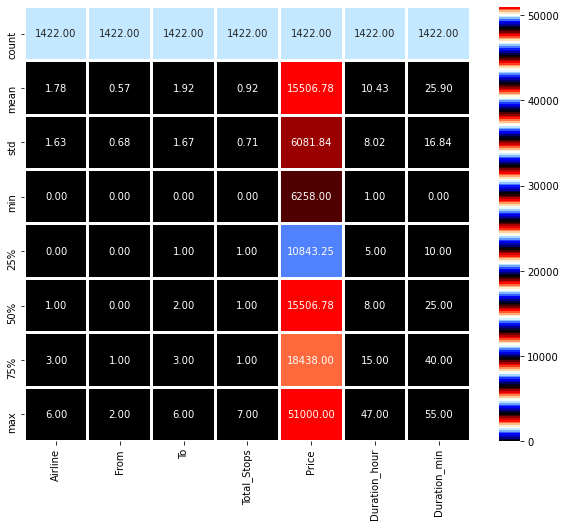

In [100]:
# Visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (10,8))
sns.heatmap(round(df.describe()[0:],2), linewidth = 2, annot= True, fmt = ".2f", cmap="flag_r")
plt.show()

Observation:

Highest number of airline preferred by people are vistara covering 29.11% of the total record

We can see that Indigo is close to the first one 

At third place we have Air India airlines that covers 15.68% of total record in our airline data

Airlines Go First, Air Asia and SpiceJet are the least used by people covering 10.2%, 8.3% and 0.14% respectively

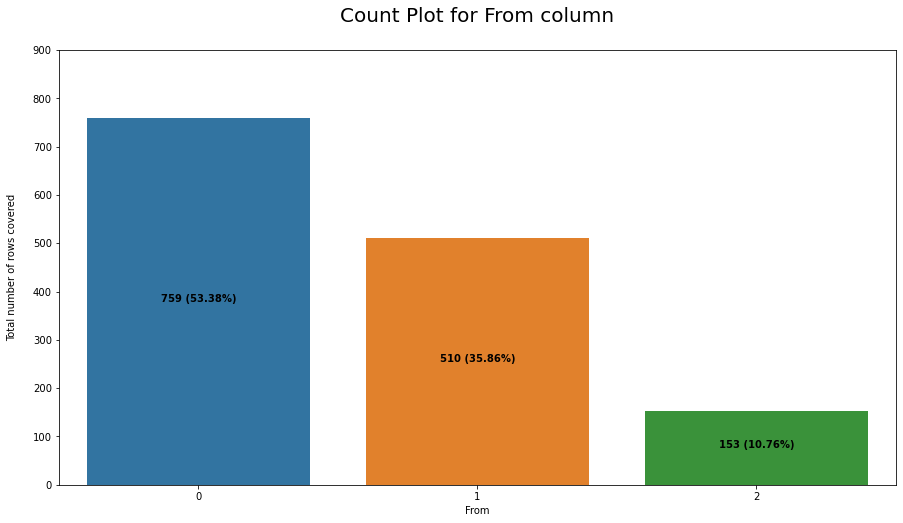

In [103]:
try:
    x = 'From'
    k=0
    plt.figure(figsize=[15,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,900)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Observation:

The departure area or source place highly used or people majorly flying from the city is "Delhi" covering 53.38% record in the column

on second we have Mumbai with 35..86% records in the column and Kolkata have 10.76%


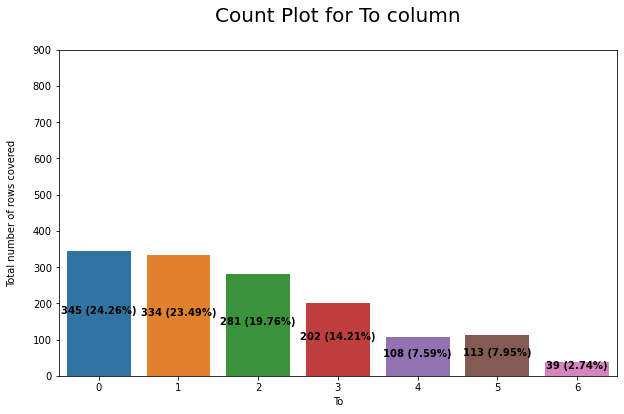

In [109]:
try:
    x = 'To'
    k=0
    plt.figure(figsize=[10,6])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,900)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Observation:
destination place people prefer to fly towards the city "Bangalore" covering 24.26% of record

Again in a similar fashion "Delhi" city is a close second destination that people like to fly towards covering 23.49% record in the column


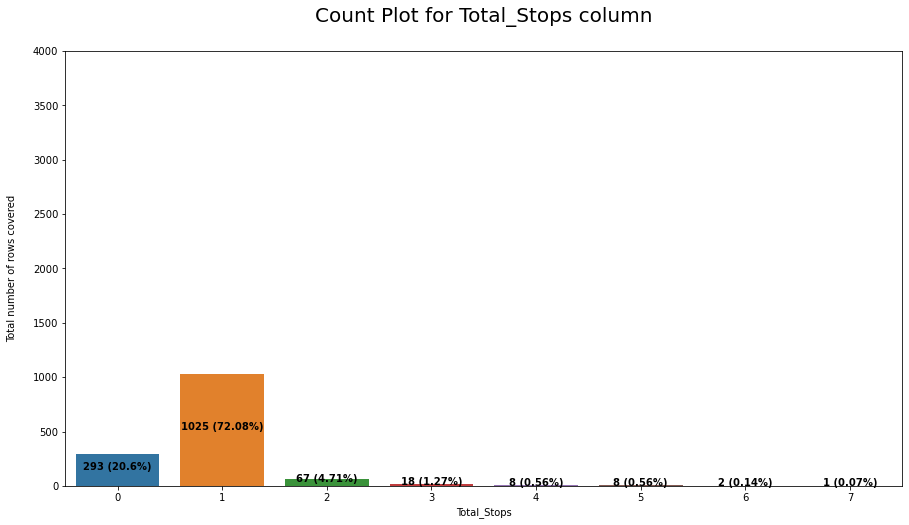

In [111]:
try:
    x = 'Total_Stops'
    k=0
    plt.figure(figsize=[15,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,4000)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

As per above plot we see number of  counts for one stop is more as compared to non stop

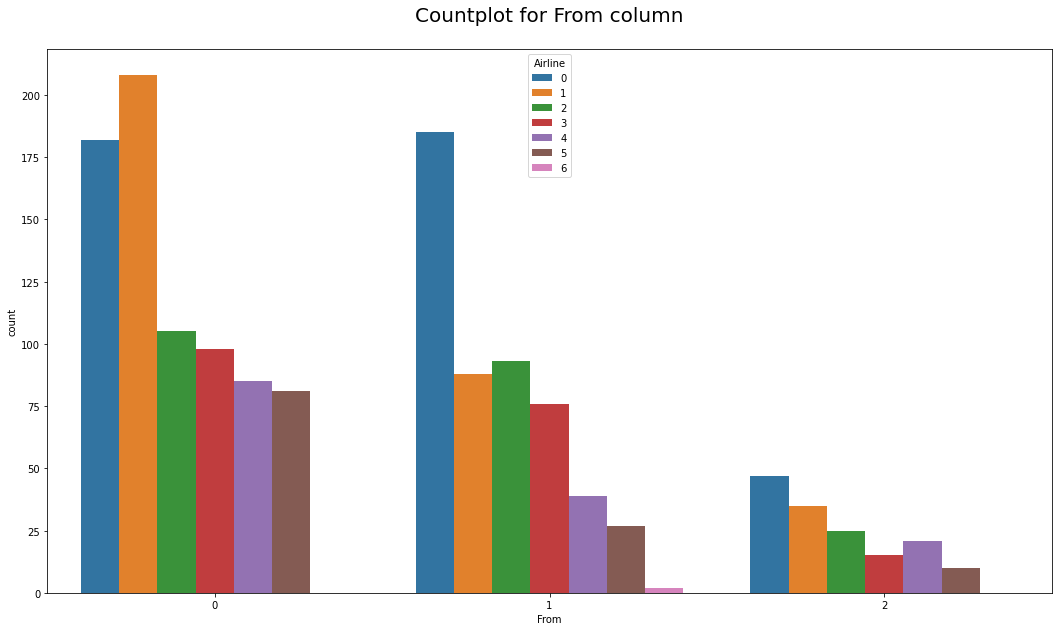

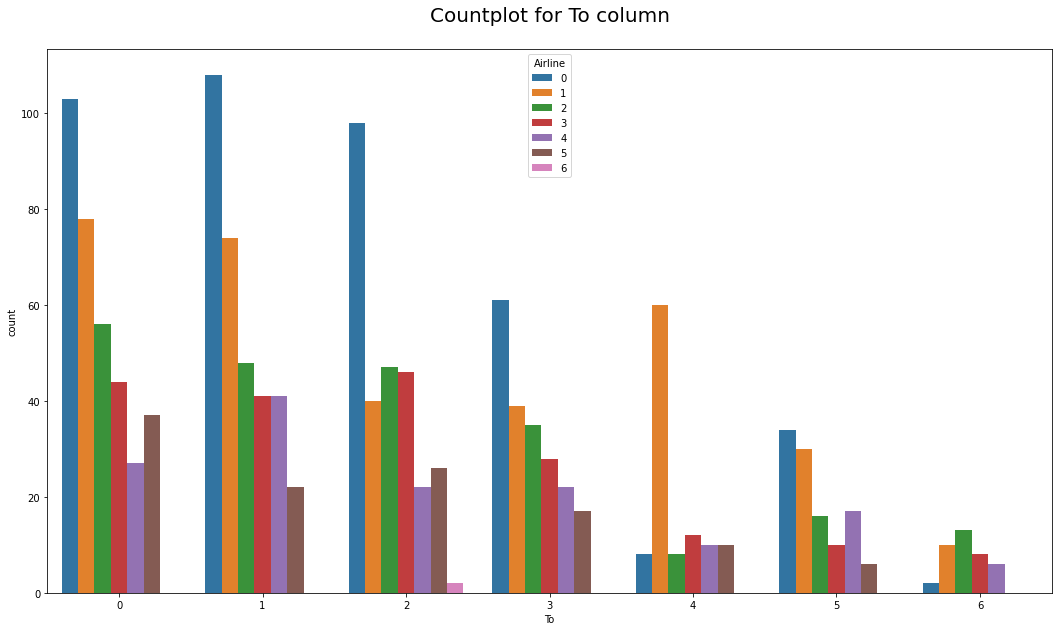

In [113]:
x = "From"
plt.figure(figsize=(18,10))
sns.countplot(x = x, hue = "Airline", data = df)
plt.title(f"Countplot for {x} column\n", fontsize = 20)
plt.show()

x = "To"
plt.figure(figsize=(18,10))
sns.countplot(x = x, hue = "Airline", data = df)
plt.title(f"Countplot for {x} column\n", fontsize = 20)
plt.show()

Observation:

Checking out the Source place details for each and every airline we can see that Bengluru city has the highest number of departure flights for Vistara airlines

Indigo and Air India are the airlines that are used in almost all the cities to depart while the other airlines do not cover some or the other city

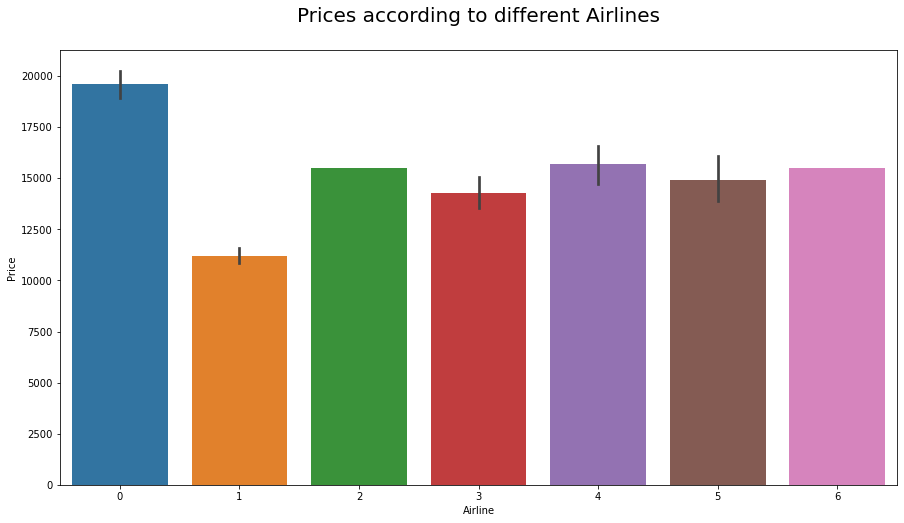

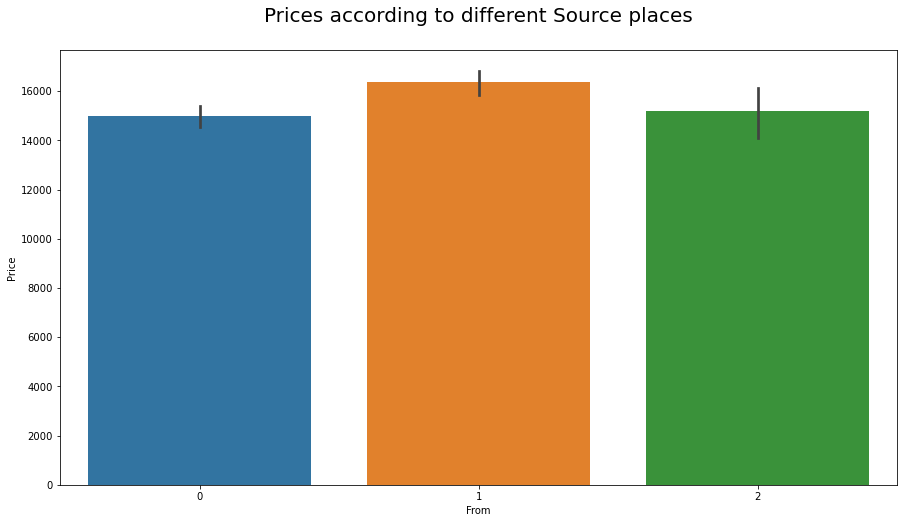

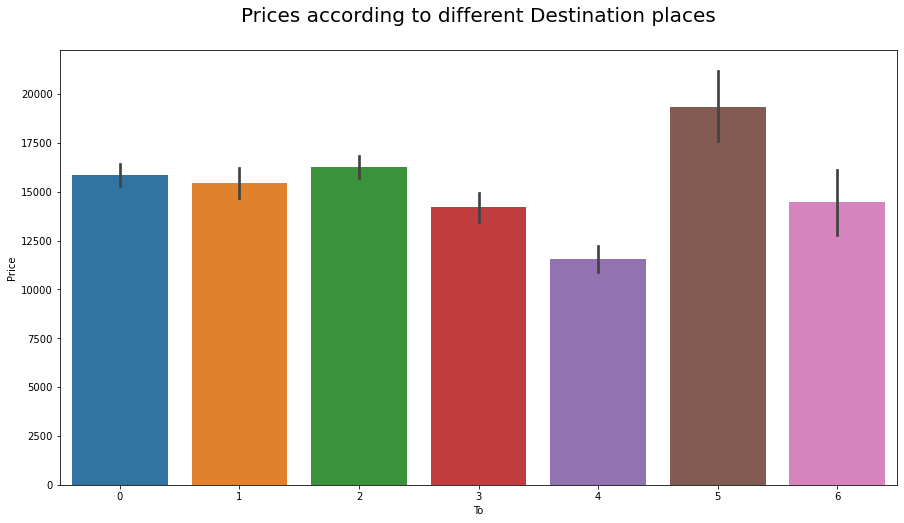

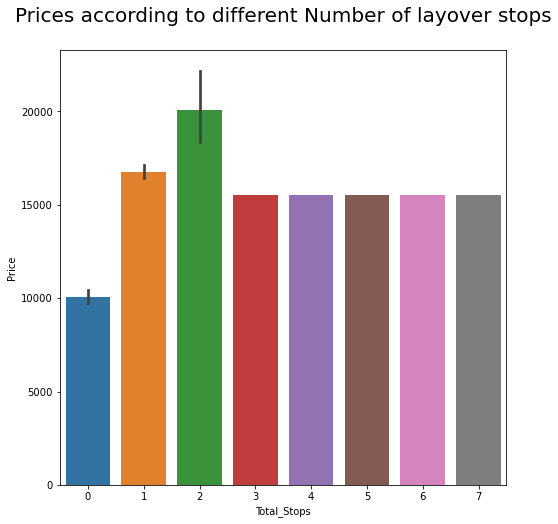

In [114]:
y = "Price"

x = "Airline"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Airlines\n", fontsize = 20)
plt.show()

x = "From"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Source places\n", fontsize = 20)
plt.show()

x = "To"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Destination places\n", fontsize = 20)
plt.show()

x = "Total_Stops"
plt.figure(figsize = (8,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Number of layover stops\n", fontsize = 20)
plt.show()

Observation:

Airfares in Vistara and Air Indi are pretty high when compared to other airlines as they provide free meal service which probably is just meal cost included in the tickets


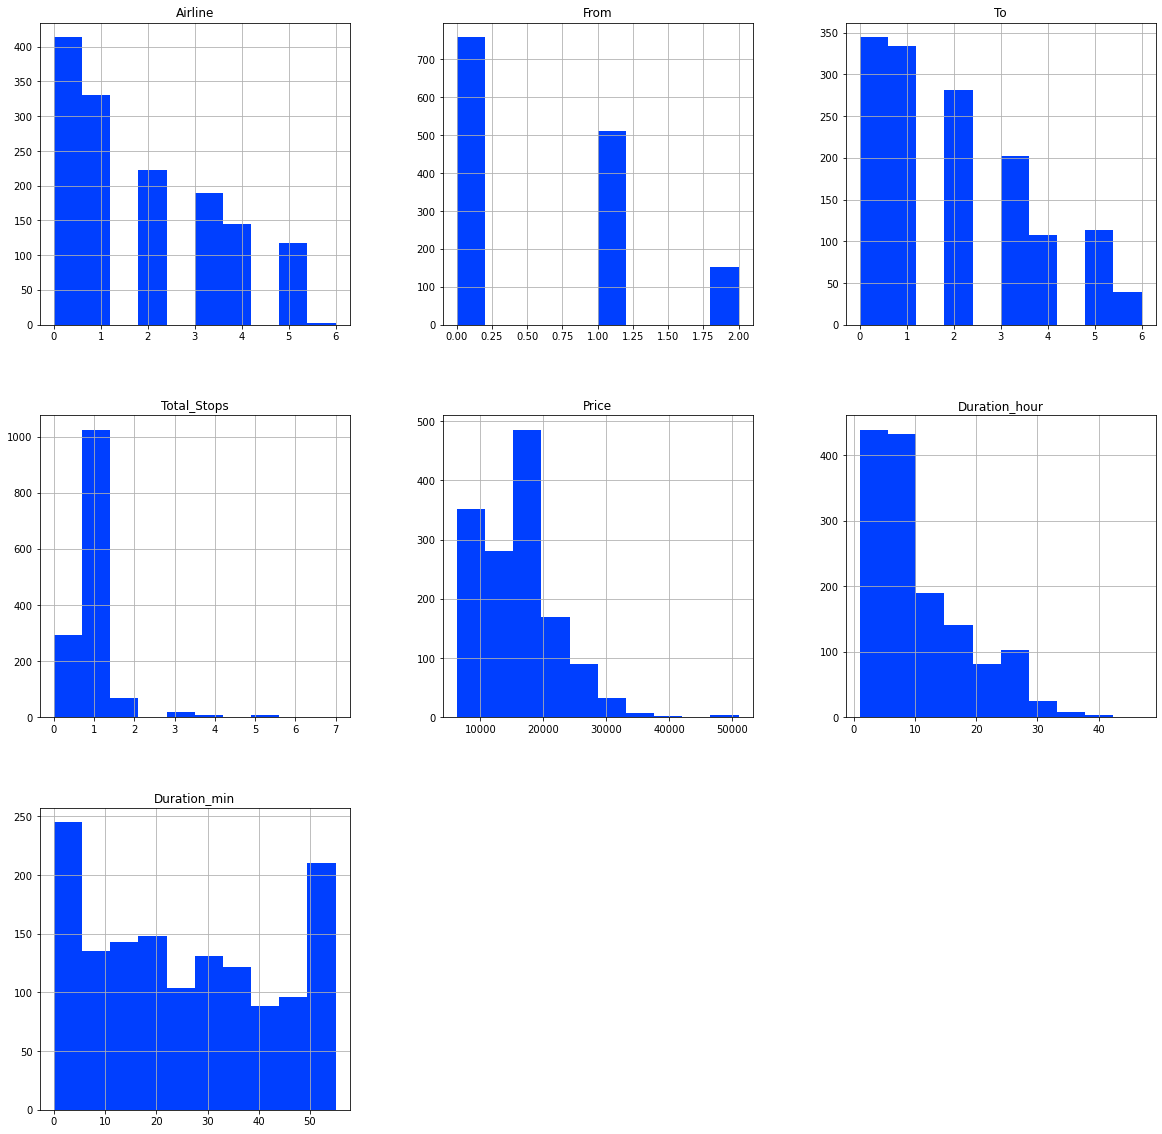

In [115]:
plt.style.use('seaborn-bright')

df.hist(figsize=(20,20))
plt.show()

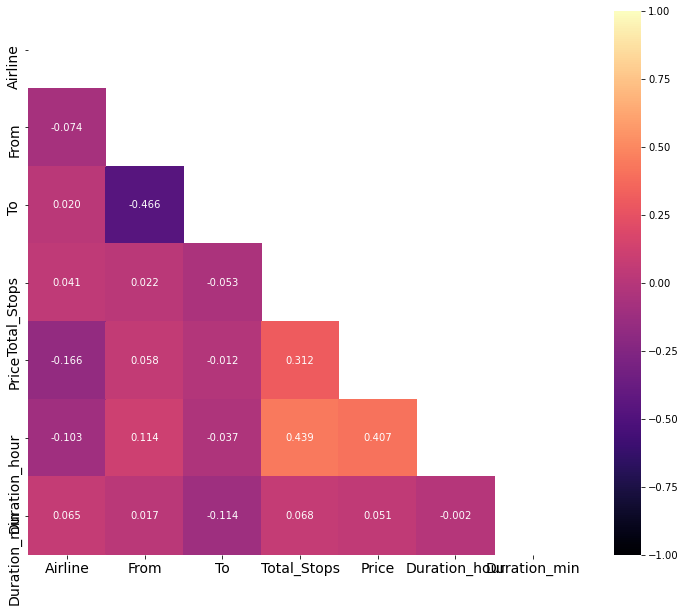

In [116]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="magma", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

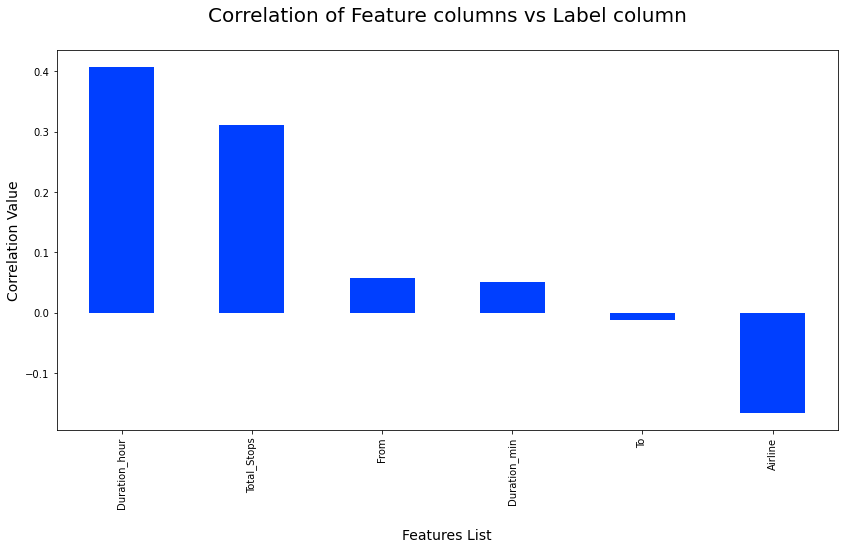

In [118]:
df_corr = df.corr()
plt.figure(figsize=(14,7))
df_corr['Price'].sort_values(ascending=False).drop('Price').plot.bar()
plt.title("Correlation of Feature columns vs Label column\n", fontsize=20)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=14)
plt.show()

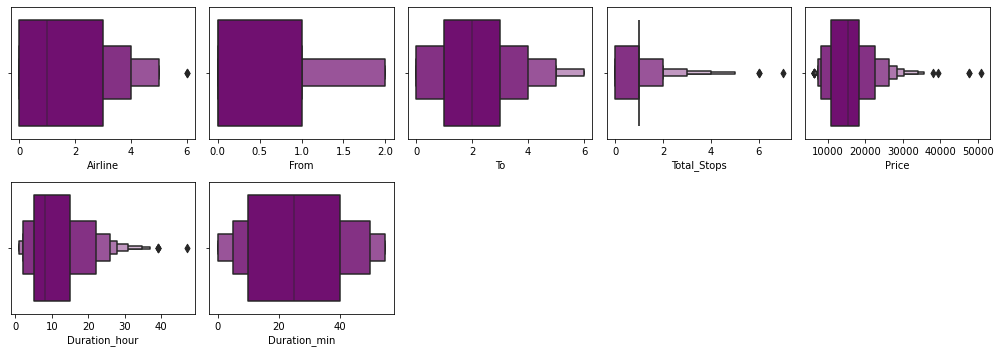

In [119]:
plt.figure(figsize=(14,7))
outl_df = df.columns.values
for i in range(0, len(outl_df)):
    plt.subplot(3, 5, i+1)
    ax = sns.boxenplot(df[outl_df[i]], color='purple')
    plt.tight_layout()

Observation:

We can see that columns "Total_ stops" and "Duration" have some outliers however since they are both datetime features we won't have to worry about the outliers here.
Similarly the outliers reflecting in our target column "Price" are of no concern either.
Here we will not worry about the outlier issue therefore won't have to deal with one either.

In [120]:
df.skew()

Airline          0.580317
From             0.767528
To               0.669210
Total_Stops      2.582019
Price            0.969872
Duration_hour    1.045171
Duration_min     0.182719
dtype: float64

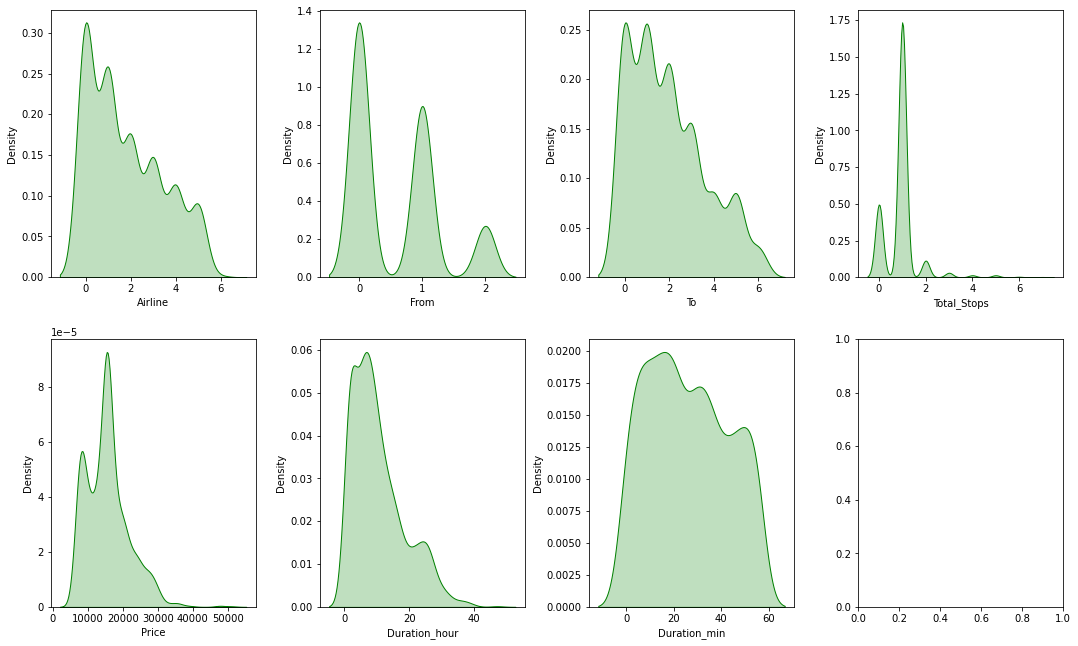

In [123]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(15,9))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.8, w_pad=0.8, h_pad=2.0)
plt.show()

In [124]:
x = df.drop('Price', axis=1)
y = df['Price']

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [128]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu*100,"on Random State", maxRS)

Best R2 score is 27.4039938962102 on Random State 881


In [131]:
# Regression Model Function

def reg(model,x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=881)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x,y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

I have built a regression function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

In [132]:
# Linear Regression Model

model=LinearRegression()
reg(model,x,y)

RMSE Score is: 4887.6048583967995
R2 Score is: 27.4039938962102
Cross Validation Score: 3.608404141590207
R2 Score - Cross Validation Score is 23.795589754619993


In [133]:
# Ridge Regularization

model=Ridge(alpha=1e-2, normalize=True)
reg(model,x,y)

RMSE Score is: 4889.135938364121
R2 Score is: 27.358504253238934
Cross Validation Score: 3.785102387397547
R2 Score - Cross Validation Score is 23.573401865841387


In [134]:
# Lasso Regularization

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model,x,y)

RMSE Score is: 4887.647377192048
R2 Score is: 27.4027308202313
Cross Validation Score: 3.616118730237381
R2 Score - Cross Validation Score is 23.78661208999392


In [135]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model,x,y)

RMSE Score is: 4998.750118539879
R2 Score is: 24.064753392575568
Cross Validation Score: -13.518953943160971
R2 Score - Cross Validation Score is 37.58370733573654


In [136]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model,x,y)

RMSE Score is: 5305.700215622137
R2 Score is: 14.452766758067014
Cross Validation Score: -35.17054903432136
R2 Score - Cross Validation Score is 49.623315792388375


In [137]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model,x,y)

RMSE Score is: 4357.764328306554
R2 Score is: 42.2904042856009
Cross Validation Score: 25.63078347350798
R2 Score - Cross Validation Score is 16.65962081209292


In [138]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model,x,y)

RMSE Score is: 4330.447403312884
R2 Score is: 43.01164919207159
Cross Validation Score: 25.99908840152344
R2 Score - Cross Validation Score is 17.012560790548147


In [139]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model,x,y)

RMSE Score is: 4067.5494759723615
R2 Score is: 49.72104516875531
Cross Validation Score: 27.543594505452234
R2 Score - Cross Validation Score is 22.177450663303077


In [140]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model,x,y)

RMSE Score is: 3592.872294071184
R2 Score is: 60.77128210095072
Cross Validation Score: -5.8820299913966
R2 Score - Cross Validation Score is 66.65331209234732


In [144]:
# Choosing Extra Trees Regressor

fmod_param = {'n_estimators' : [100, 200, 300],
              'criterion' : ['squared_error', 'mse', 'absolute_error', 'mae'],
              'n_jobs' : [-2, -1, 1]
             }

GSCV = GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'n_estimators': [100, 200, 300],
                         'n_jobs': [-2, -1, 1]})

In [145]:
GSCV.best_params_

{'criterion': 'mse', 'n_estimators': 100, 'n_jobs': 1}

In [158]:
Final_Model = ExtraTreesRegressor(criterion='mse', n_estimators=100, n_jobs=1)
Model_Training = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_r2 = r2_score(y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 54.26533469356693


In [160]:
Predicted_Price = Final_Model.predict(x)
# Checking the predicted price details in dataframe format
predicted_output = pd.DataFrame()
predicted_output['Flight Price Predicted'] = Predicted_Price
predicted_output['Flight Price Actual'] = df["Price"]
predicted_output

,Flight Price Predicted,Flight Price Actual
0,7581.500000,7319.000000
1,7581.500000,7319.000000
2,7319.000000,7319.000000
3,7319.000000,7319.000000
4,7319.000000,7319.000000
5,7319.000000,7319.000000
6,12044.000000,7319.000000
7,7319.000000,7319.000000
8,7319.000000,7319.000000
9,7319.000000,7319.000000


In [162]:
import joblib
filename = "FlightPricePrediction.pkl"
joblib.dump(Final_Model, filename)

['FlightPricePrediction.pkl']